In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import os

import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter, LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate, GridSearchCV

from mylearn.linear_model import LinearRegression, RidgeRegression, GDRegressor
#from mylearn.neural_network import NeuralNetwork
from mylearn.ml_tools import *
from mylearn.project_tools import fig_path
from sklearn.linear_model import SGDRegressor
import seaborn as sns

from imageio import imread
from numpy.random import normal, uniform

# Set fontsizes in figures
params = {'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          'legend.fontsize': 'large',
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.rc('text', usetex=False)

import warnings
# Comment this to turn on warnings
warnings.filterwarnings('ignore')

### GD Methods for simple training and test data

Inversion: 2.023806876798601 [2.02380688 2.87128142]
Batch GD: 2.033797773672934 [2.32546639 2.58086376]
Stochastic GD: 2.001546396889606 [1.89257375 3.0369118 ]
Mini-Batch GD: 2.3631491842285923 [1.76954858 2.84321841]
SGDreg from Sklearn: [2.13355887] [2.13355887 2.66986128]


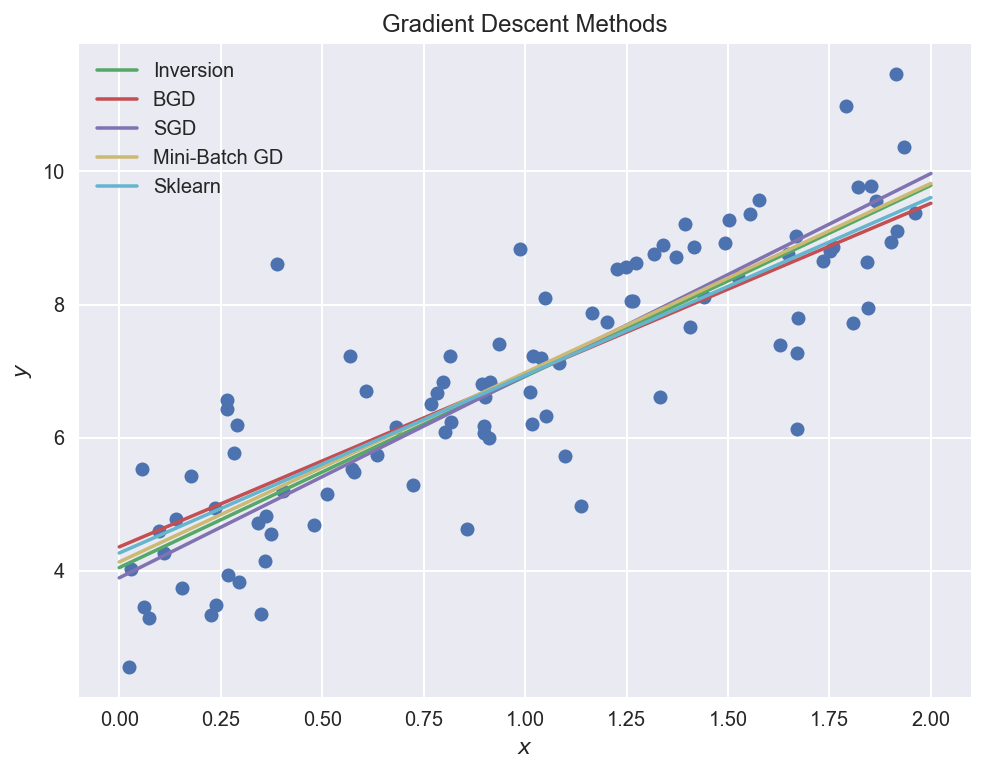

In [2]:
m = 100

np.random.seed(40)

# Training data
x = 2 * np.random.rand(m, 1)
y = 4 + 3 * x + np.random.randn(m, 1)
X = np.c_[np.ones((m, 1)), x]

# Test data
xnew = np.array([[0], [2]])
Xnew = np.c_[np.ones((2, 1)), xnew]

# Matrix inversion
inv_reg = GDRegressor(gamma=0, lmbda=0, eta=0.01, n_epochs=100, t0=5, t1=50, batch_size=20, fit_intercept=True)
inv_reg.fit(X, y.ravel(), method="Inv")
ypred_inv = inv_reg.predict(Xnew)
print("Inversion:", inv_reg.intercept_, inv_reg.coef_)

# Batch GD
bgd_reg = GDRegressor(gamma=0, lmbda=0, eta=0.01, n_epochs=100, t0=5, t1=50, batch_size=20, fit_intercept=True)
bgd_reg.fit(X, y.ravel(), method="BGD")
ypred_bgd = bgd_reg.predict(Xnew)
print("Batch GD:", bgd_reg.intercept_, bgd_reg.coef_)

# Stochastic GD
sgd_reg = GDRegressor(gamma=0, lmbda=0, eta=0.01, n_epochs=100, t0=5, t1=50, batch_size=20, fit_intercept=True)
sgd_reg.fit(X, y.ravel(), method="SGD")
ypred_sgd = sgd_reg.predict(Xnew)
print("Stochastic GD:", sgd_reg.intercept_, sgd_reg.coef_)

# Mini-Batch GD
mbgd_reg = GDRegressor(gamma=0, lmbda=0, eta=0.01, n_epochs=100, t0=5, t1=50, batch_size=20, fit_intercept=True)
mbgd_reg.fit(X, y.ravel(), method="MBGD")
ypred_mbgd = mbgd_reg.predict(Xnew)
print("Mini-Batch GD:", mbgd_reg.intercept_, mbgd_reg.coef_)

# SGDRegressor Sklearn
sgdreg_sk = SGDRegressor(max_iter=100, penalty=None, eta0=0.01, alpha=0)
sgdreg_sk.fit(X, y.ravel())
print("SGDreg from Sklearn:", sgdreg_sk.intercept_, sgdreg_sk.coef_)
ypred_sk = sgdreg_sk.predict(Xnew)


fig = plt.figure(figsize=(8, 6))
plt.style.use('seaborn')
plt.plot(x, y, "o")
plt.plot(xnew, ypred_inv, "-", label="Inversion")
plt.plot(xnew, ypred_bgd, "-", label="BGD")
plt.plot(xnew, ypred_sgd, "-", label="SGD")
plt.plot(xnew, ypred_mbgd, "-", label="Mini-Batch GD")
plt.plot(xnew, ypred_sk, "-", label="Sklearn")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title("Gradient Descent Methods")
plt.legend()
plt.show()
fig.savefig(fig_path("Algorithms.pdf"), dpi=300)
